In [107]:
import tensorflow as tf
import numpy as np
import pandas
import os
import matplotlib.pyplot as plt

%matplotlib inline

def featureNormalise(X):
    mu = np.mean(X,0)
    sigma = np.std(X,0, ddof=1)
    return ((X - mu) / sigma), mu, sigma

## Load Training data
dataset = pandas.read_csv("data/ex1data2.txt", header=None)
m,n = dataset.shape
x = dataset.values[:,0:n-1].reshape(m,n-1)
y = dataset.values[:,-1].reshape(m,1)

## Load Validation and Test data

## Normalise
x_norm, mu, sigma = featureNormalise(x)

# Add bias
x_with_bias = np.hstack((np.ones((x_norm.shape[0],1)),x_norm)).astype(np.float32)

In [108]:
import tensorflow as tf

# We'll bundle groups of examples during training for efficiency.
# This defines the size of the batch.
BATCH_SIZE = m

NUM_FEATURES = n
NUM_LABELS = 1
# The random seed that defines initialization.
#SEED = 42

# This is where training samples and labels are fed to the graph.
# These placeholder nodes will be fed a batch of training data at each
# training step, which we'll write once we define the graph structure.
train_data_node = tf.placeholder(tf.float32, shape=(BATCH_SIZE, NUM_FEATURES))
train_labels_node = tf.placeholder(tf.float32, shape=(BATCH_SIZE, NUM_LABELS))

# The variables below hold all the trainable weights. For each, the
# parameter defines how the variables will be initialized. 
# TODO : These should be pulled from a config file

weights = tf.Variable(tf.zeros([n, 1]))
    
print('Done')

Done


In [109]:
def model(data, train=False):
    """The Model definition."""
    # Linear Regression

    # learning_rate is the step size, so how much we jump from the current spot
    #learning_rate = 0.01

    # The operations in the operation graph.
    # Compute the predicted y values given our current weights
    yhat = tf.matmul(data, weights)
    
    return yhat
    
print('Done')

Done


In [110]:
yhat = model(train_data_node, True)

# How much does this differ from the actual y?
yerror = tf.subtract(yhat, train_labels_node)
# Change the weights by subtracting derivative with respect to that weight
loss = (1.0 / (2 * m)) * tf.reduce_sum(tf.multiply(yerror, yerror))

# Optimizer: 

# Decay 
learning_rate = 0.1
# Gradient Descent
gradient = tf.reduce_sum(tf.transpose(tf.multiply(train_data_node, yerror)), 1, keep_dims=True)
update_weights = tf.assign_sub(weights, (learning_rate / m) * gradient)

# Predictions
train_prediction = yhat

print('Done')

Done


In [111]:
#################
##### Train #####
#################

# Create a new interactive session that we'll use in
# subsequent code cells.
s = tf.InteractiveSession()

# Use our newly created session as the default for 
# subsequent operations.
s.as_default()

# Initialize all the variables we defined above.
tf.global_variables_initializer().run()



# Keep track of the loss at each iteration so we can chart it later
losses = []
# How many iterations to run our training
training_steps = 600
# The learning rate. Also known has the step size. This changes how far
# we move down the gradient toward lower error at each step. Too large
# jumps risk inaccuracy, too small slow the learning.
learning_rate = 0.1

for _ in range(training_steps):
    # Feed the entire batch
    # Grab the first BATCH_SIZE examples and labels.
    batch_data = x_with_bias[:BATCH_SIZE,:]
    batch_labels = y[:BATCH_SIZE,:]
    
    # This dictionary maps the batch data (as a numpy array) to the
    # node in the graph it should be fed to.
    feed_dict = {train_data_node: batch_data,
                 train_labels_node: batch_labels}
    
    # Run the graph and fetch some of the nodes.
    betas, l, predictions = s.run(
        [update_weights, loss, train_prediction],
        feed_dict=feed_dict)
    
    # Print out the loss periodically.
    losses.append(l)


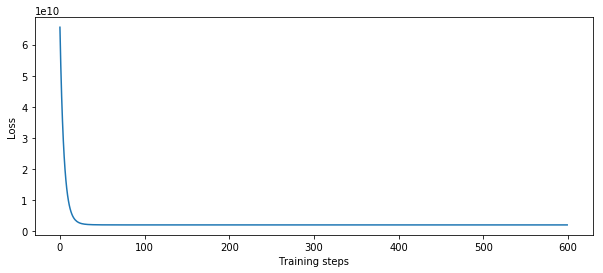

In [112]:
# Show the fit and the loss over time.
fig, (ax1) = plt.subplots(1, 1)
plt.subplots_adjust(wspace=.3)
fig.set_size_inches(10, 4)

ax1.plot(range(0, training_steps), losses)
ax1.set_ylabel("Loss")
ax1.set_xlabel("Training steps")
plt.show()

In [113]:
betas

array([[ 340412.53125   ],
       [ 110631.        ],
       [  -6649.44580078]], dtype=float32)

In [114]:
prediction = model(tf.constant(np.hstack((1, ([1650, 3] - mu) / sigma)).reshape(1,3).astype(np.float32)), True)

prediction.eval()

array([[ 293081.34375]], dtype=float32)